# Benchmark Analysis: OTIS Mock AIME 2024-2025

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**What is OTIS Mock AIME 2024-2025?** 

*Olympiad Training for Individual Study (OTIS)*, a proof-based olympiad training program, creates a mock version of the *American Invitational Mathematics Examination (AIME)* for the 2024-2025 timeframe. The AIME is a challenging mathematics competition for high school students who perform well on the *AMC (American Mathematics Competitions)*. This benchmark specifically tests advanced problem-solving skills in mathematics, focusing on areas like combinatorics, number theory, algebra, and geometry, often requiring creative and insightful solutions. The score indicates the number of correct answers or a similar performance metric on this mock exam.

**Difference with MATH Level 5**

*MATH level 5* is a more general assessment of strong high school-level mathematics.

*OTIS Mock AIME* is a much more specialized and significantly harder test designed to challenge the very best high school mathematics students. It delves deeper into specific mathematical areas and requires a higher level of problem-solving creativity and sophistication.

## File Reading and Dataset Preparation

In [2]:
df = pd.read_csv("master.csv")
# Convert 'Version Release Date' to datetime objects
df['Version Release Date'] = pd.to_datetime(df['Version Release Date'])

In [3]:
df.head()

,Model Name,Version Release Date,Benchmark,Benchmark Score,Organization,Country
0,Claude 2,2023-07-11,GPQA diamond,0.346591,Anthropic,United States of America
1,Claude 2,2023-07-11,MATH level 5,0.117258,Anthropic,United States of America
2,Claude 2.1,2023-11-21,GPQA diamond,0.329545,Anthropic,United States of America
3,Claude 3.5 Sonnet,2024-06-20,GPQA diamond,0.540404,Anthropic,United States of America
4,Claude 3.5 Sonnet,2024-06-20,MATH level 5,0.516805,Anthropic,United States of America


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Model Name            326 non-null    object        
 1   Version Release Date  326 non-null    datetime64[ns]
 2   Benchmark             326 non-null    object        
 3   Benchmark Score       326 non-null    float64       
 4   Organization          326 non-null    object        
 5   Country               326 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 15.4+ KB


#### Data Preparation For This Analysis

In [5]:
mock_AIME = df[df["Benchmark"] == "OTIS Mock AIME 2024-2025"]
mock_AIME.head()

,Model Name,Version Release Date,Benchmark,Benchmark Score,Organization,Country
137,Mistral Large 2,2024-07-24,OTIS Mock AIME 2024-2025,0.084722,Mistral AI,France
138,DeepSeek-R1,2025-01-20,OTIS Mock AIME 2024-2025,0.533333,DeepSeek,China
139,Gemini 2.0 Flash,2025-02-05,OTIS Mock AIME 2024-2025,0.311111,Google,United States of America
142,GPT-4o,2024-11-20,OTIS Mock AIME 2024-2025,0.062500,OpenAI,United States of America
143,Phi-4,2024-12-12,OTIS Mock AIME 2024-2025,0.137500,Microsoft,United States of America


In [6]:
mock_AIME.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71 entries, 137 to 315
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Model Name            71 non-null     object        
 1   Version Release Date  71 non-null     datetime64[ns]
 2   Benchmark             71 non-null     object        
 3   Benchmark Score       71 non-null     float64       
 4   Organization          71 non-null     object        
 5   Country               71 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 3.9+ KB


## EDA

#### Master data

In [7]:
# List of unique models
model_names = df['Model Name'].unique()
print(f"Number of Unique Models: {len(model_names)}")
print("\n" + "Number of Observations for Each Benchmark: ")
df.value_counts('Benchmark') 

Number of Unique Models: 81

Number of Observations for Each Benchmark: 


Benchmark
GPQA diamond                       99
MATH level 5                       92
OTIS Mock AIME 2024-2025           71
FrontierMath-2025-02-28-Private    32
FrontierMath-2025-02-28-Public     28
SWE-Bench verified                  4
Name: count, dtype: int64

**Note:** Some models took the same test multiple times

#### Mock AIME data

In [8]:
print("\n" + "Number of Observations by Organization:")
mock_AIME.value_counts("Organization")


Number of Observations by Organization:


Organization
OpenAI                      16
Anthropic                   12
Google                      12
Meta AI                     10
Alibaba                      5
Mistral AI                   5
DeepSeek                     4
xAI                          4
Arcee AI                     1
Microsoft                    1
University of Washington     1
Name: count, dtype: int64

In [9]:
print("\n" + "Number of Observations by Country:")
mock_AIME.value_counts("Country")


Number of Observations by Country:


Country
United States of America    57
China                        9
France                       5
Name: count, dtype: int64

In [10]:
# Identify models that took the test more than once
model_counts = mock_AIME['Model Name'].value_counts()
models_tested_more_than_once = model_counts[model_counts > 1].index.tolist()
print("\n" + "Number of Observations by Model Name (more than one):")
model_counts[model_counts > 1]


Number of Observations by Model Name (more than one):


Model Name
Claude 3.7 Sonnet    4
GPT-4o               3
Mistral Large 2      2
Grok-3 mini          2
DeepSeek-V3          2
Gemini 1.5 Flash     2
Claude 3.5 Sonnet    2
Gemini 1.5 Pro       2
o1-mini              2
o3-mini              2
Name: count, dtype: int64

In [11]:
# Investigate the models that took the test more than once
a = mock_AIME.value_counts("Model Name")[:10]
for model in a.index:
    print(mock_AIME[mock_AIME['Model Name'] == model][['Model Name', 'Version Release Date', 'Benchmark Score']])

            Model Name Version Release Date  Benchmark Score
155  Claude 3.7 Sonnet           2025-02-24         0.219444
178  Claude 3.7 Sonnet           2025-02-24         0.466667
232  Claude 3.7 Sonnet           2025-02-24         0.533333
242  Claude 3.7 Sonnet           2025-02-24         0.577778
    Model Name Version Release Date  Benchmark Score
142     GPT-4o           2024-11-20         0.062500
147     GPT-4o           2024-05-13         0.062500
148     GPT-4o           2024-08-06         0.063889
          Model Name Version Release Date  Benchmark Score
137  Mistral Large 2           2024-07-24         0.084722
175  Mistral Large 2           2024-11-18         0.077778
         Model Name Version Release Date  Benchmark Score
160  Gemini 1.5 Pro           2024-09-24         0.230556
161  Gemini 1.5 Pro           2024-05-24         0.068056
           Model Name Version Release Date  Benchmark Score
157  Gemini 1.5 Flash           2024-09-24         0.162500
158  Gemini 

##### Summary of Findings
- Some models have different benchmark scores, but have the same version release date **>> I'll use the observation with the highest score**
- Remaining models have different benchmark scores, and have different version release dates **>> I'll use the observation with the latest version**

##### Data Cleaning

In [12]:
# Sort the DataFrame by 'Model Name', 'Version Release Date', and 'Benchmark Score' (descending)
sorted_df = mock_AIME.sort_values(['Model Name', 'Version Release Date', 'Benchmark Score'], ascending=[True, False, False])

# Group by 'Model Name' and 'Version Release Date' and keep the first row (highest score)
mock_AIME = sorted_df.groupby(['Model Name', 'Version Release Date']).first().reset_index()

mock_AIME.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Model Name            65 non-null     object        
 1   Version Release Date  65 non-null     datetime64[ns]
 2   Benchmark             65 non-null     object        
 3   Benchmark Score       65 non-null     float64       
 4   Organization          65 non-null     object        
 5   Country               65 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 3.2+ KB


In [13]:
# Sort the DataFrame by 'Model Name' and then by 'Version Release Date' in descending order
mock_AIME.sort_values(['Model Name', 'Version Release Date'], ascending=[True, False], inplace=True)

# Drop duplicates, keeping only the first occurrence (which is the latest due to sorting)
mock_AIME.drop_duplicates(subset=['Model Name'], keep='first', inplace=True)

# Reset the index of the modified DataFrame
mock_AIME.reset_index(drop=True, inplace=True)
mock_AIME.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Model Name            58 non-null     object        
 1   Version Release Date  58 non-null     datetime64[ns]
 2   Benchmark             58 non-null     object        
 3   Benchmark Score       58 non-null     float64       
 4   Organization          58 non-null     object        
 5   Country               58 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 2.8+ KB


In [14]:
mock_AIME.value_counts("Organization")

Organization
OpenAI                      12
Google                      10
Meta AI                     10
Anthropic                    8
Alibaba                      5
Mistral AI                   4
DeepSeek                     3
xAI                          3
Arcee AI                     1
Microsoft                    1
University of Washington     1
Name: count, dtype: int64

#### Investigation on Models which haven't taken Mock AIME

In [15]:
print("\n" + "Models which haven't taken Mock AIME:")
sorted([model for model in model_names if model not in mock_AIME['Model Name'].unique()])


Models which haven't taken Mock AIME:


['DBRX',
 'DeepSeek LLM 67B',
 'DeepSeek-R1-Distill-Qwen-14B',
 'Eurus-2-7B-PRIME',
 'GPT-3.5 Turbo',
 'GPT-4',
 'GPT-4o mini',
 'Gemini 2.0 Pro',
 'Gemini 2.5 Pro',
 'Ministral 3B',
 'Ministral 8B',
 'Mistral 7B',
 'Mistral NeMo',
 'Mixtral 8x22B',
 'Mixtral 8x7B',
 'QWQ-Plus',
 'Qwen1.5-32B',
 'Qwen1.5-72B',
 'Qwen2-72B',
 'WizardLM-2 8x22B',
 'Yi-1.5-34B',
 'Yi-34B',
 'phi-3-medium 14B']

##### Investigation on Some Models

In [16]:
df[df["Model Name"] == 'GPT-4']

,Model Name,Version Release Date,Benchmark,Benchmark Score,Organization,Country
27,GPT-4,2024-01-25,GPQA diamond,0.422664,OpenAI,United States of America
28,GPT-4,2023-06-13,GPQA diamond,0.306503,OpenAI,United States of America
29,GPT-4,2023-06-13,MATH level 5,0.229702,OpenAI,United States of America
30,GPT-4,2023-11-06,GPQA diamond,0.423611,OpenAI,United States of America
31,GPT-4,2023-11-06,MATH level 5,0.400208,OpenAI,United States of America
63,GPT-4,2024-01-25,MATH level 5,0.354135,OpenAI,United States of America


In [17]:
df[df["Model Name"] == 'Ministral 3B']

,Model Name,Version Release Date,Benchmark,Benchmark Score,Organization,Country
80,Ministral 3B,2024-10-16,GPQA diamond,0.252525,Mistral AI,France
88,Ministral 3B,2024-10-16,MATH level 5,0.144449,Mistral AI,France


In [18]:
df[df["Model Name"] == 'WizardLM-2 8x22B']

,Model Name,Version Release Date,Benchmark,Benchmark Score,Organization,Country
74,WizardLM-2 8x22B,2024-04-15,GPQA diamond,0.434343,01.AI,China
76,WizardLM-2 8x22B,2024-04-15,MATH level 5,0.257364,01.AI,China


##### Summary of Findings
The architectures and the sizes of the models vary.

## Visualizations and Analysis

#### Performance Improvement Over Time

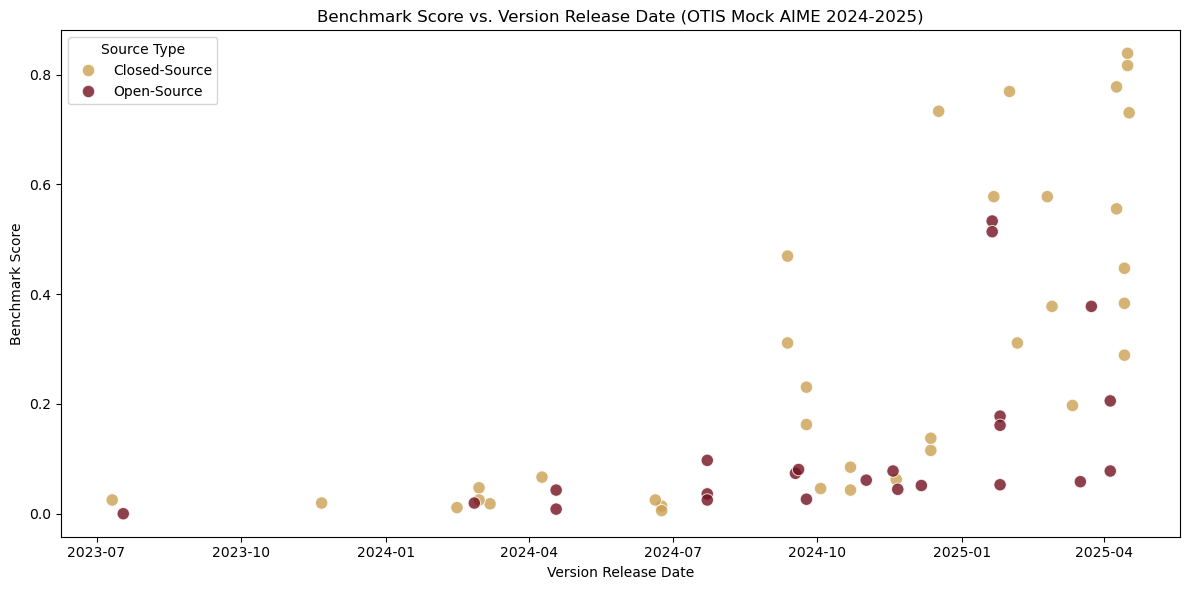

In [19]:
# Define open-source and closed-source organizations
open_source_orgs = ['Meta AI', 'Alibaba', 'Mistral AI', 'DeepSeek', 'University of Washington']
closed_source_orgs = ['OpenAI', 'Google', 'Anthropic', 'xAI', 'Arcee AI', 'Microsoft']

# Create a new column 'Source Type' based on the organization
def categorize_source(org):
    if org in open_source_orgs:
        return 'Open-Source'
    elif org in closed_source_orgs:
        return 'Closed-Source'
    else:
        return 'Unknown'

mock_AIME['Source Type'] = mock_AIME['Organization'].apply(categorize_source)

# Define the color palette
color_palette = {
    'Open-Source': '#72111F',
    'Closed-Source': '#CBA052',
    'Unknown': '#545658'
}

# Create the scatter plot with color based on 'Source Type'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Version Release Date', y='Benchmark Score', hue='Source Type', data=mock_AIME, alpha=0.8, s=80, palette=color_palette)

# Add title and labels
plt.title('Benchmark Score vs. Version Release Date (OTIS Mock AIME 2024-2025)')
plt.xlabel('Version Release Date')
plt.ylabel('Benchmark Score')
plt.legend(title='Source Type')
plt.tight_layout()
plt.show()

##### Summary of Findings

**General Trend of Improvement:** Over the last couple of years, AI models have generally become much better at solving very challenging math problems. This shows that AI is continuously advancing in its reasoning and problem-solving skills.

**Closed-Source Models Leading the Way:** Models developed by companies that keep their technology proprietary (closed-source) currently tend to perform better on these advanced math tests and have shown a larger increase in their scores over time compared to open-source models.

**Growing Differences in Performance:** As AI models get more advanced, the difference in how well various models perform on these difficult math problems is also increasing. This means that when choosing an AI for tasks like this, you need to be careful and select one that has a proven track record.

**Open-Source Models Making Progress:** While currently behind the closed-source leaders, AI models whose technology is shared openly (open-source) are also improving their ability to solve complex math problems. 

#### Distribution of Benchmark Scores

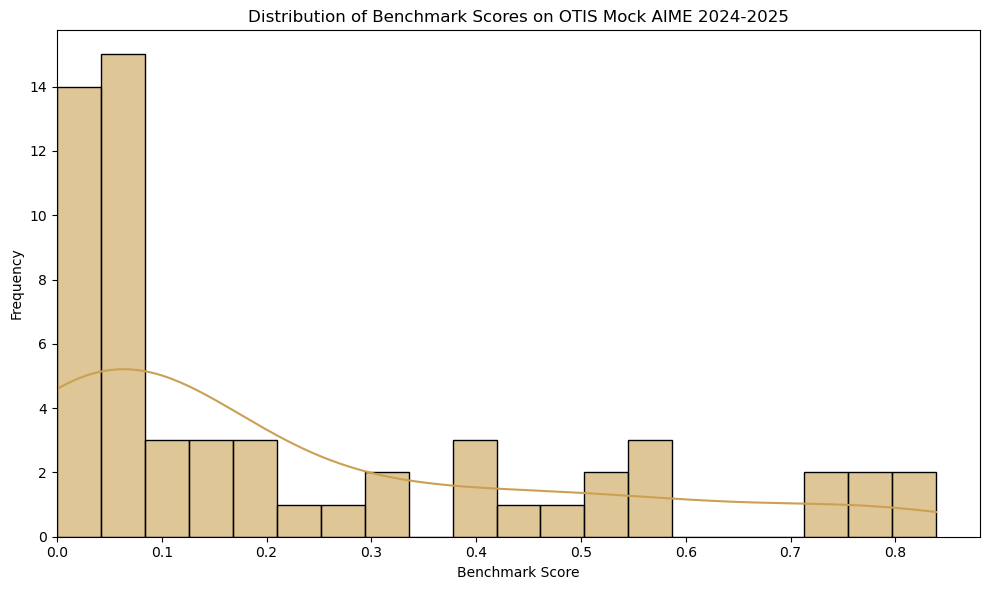

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(mock_AIME['Benchmark Score'], bins=20, kde=True, color='#CBA052', alpha=0.6)
plt.title('Distribution of Benchmark Scores on OTIS Mock AIME 2024-2025')
plt.xlabel('Benchmark Score')
plt.ylabel('Frequency')
plt.xlim(0)
plt.tight_layout()
plt.show()

##### Summary of Findings:

- **Wide Performance Variability:** The histogram clearly shows a significant spread in benchmark scores achieved by different AI models on the OTIS Mock AIME. This indicates a substantial difference in their ability to handle complex mathematical problems.

- **Difficulty for Many Models:** A large number of models exhibit low scores, clustering near zero. This highlights the considerable challenge that advanced high school-level mathematics, as represented by the AIME, poses for a significant portion of the current AI landscape.

- **Emergence of Performance Clusters:** The distribution suggests potential groupings of models based on their performance levels (low, mid, and high). This could be attributed to variations in model size, architecture, and training strategies, with some models being better equipped for complex reasoning tasks.

- **Presence of High-Performing Outliers:** While many models struggle, a subset demonstrates a considerably higher level of proficiency on this demanding benchmark, indicating progress in AI's ability to tackle advanced mathematical problem-solving.

- **Specialized Capability:** Strong performance on the OTIS Mock AIME is not yet a widely achieved capability across all AI models. The distribution suggests that excelling in this type of complex mathematical reasoning often requires specific architectural innovations, targeted training, or specialized design focused on logical and analytical skills.

- **User Perspective:** For users seeking AI models with strong mathematical problem-solving abilities at this advanced level, it is crucial to carefully select models that have demonstrated high performance on benchmarks like the OTIS Mock AIME. The wide variability indicates that not all AI models are equally capable in this domain.

#### Benchmark Score vs. Organization

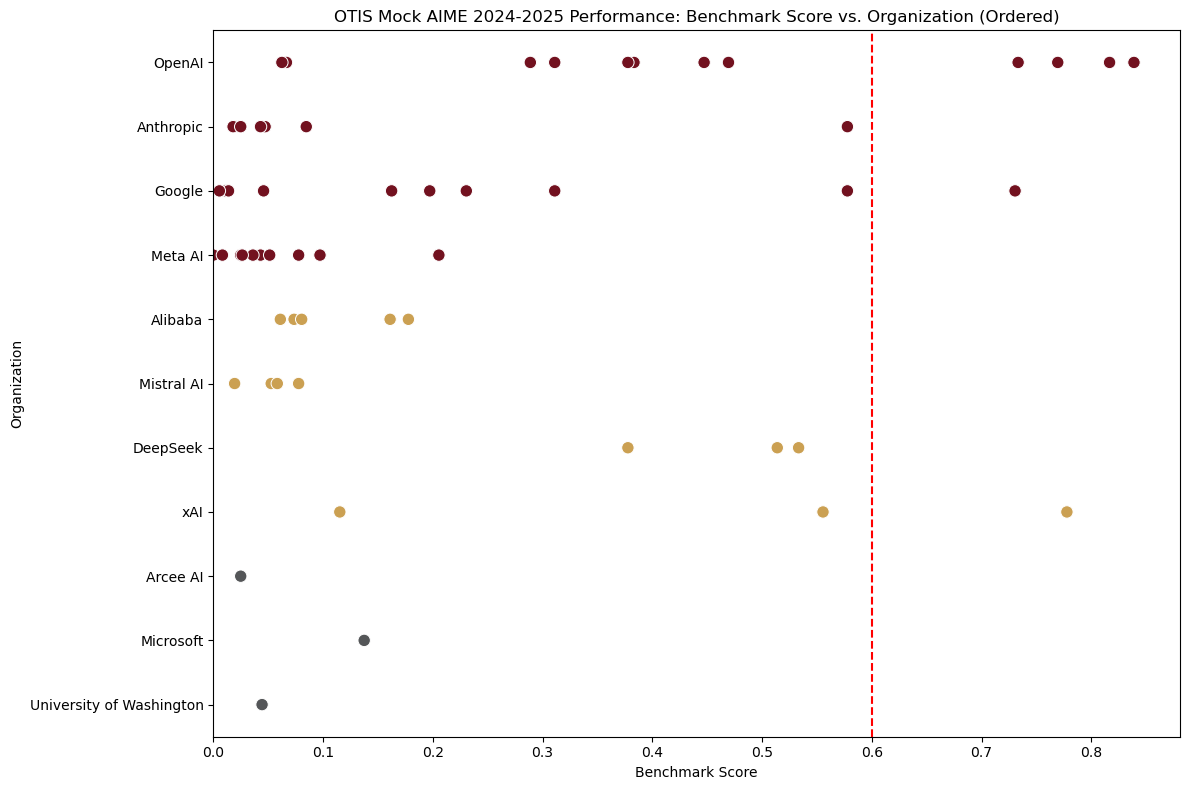

In [23]:
# Define organization categories and the desired order
most_popular = ['OpenAI', 'Anthropic', 'Google', 'Meta AI']
mid_popular = ['Alibaba', 'Mistral AI', 'DeepSeek', 'xAI']
least_popular = ['Arcee AI', 'Microsoft', 'University of Washington']
ordered_organizations = most_popular + mid_popular + least_popular

# Create a new column to categorize organizations (optional, but helpful for color)
def categorize_organization(org):
    if org in most_popular:
        return 'Most Popular'
    elif org in mid_popular:
        return 'Mid Popular'
    elif org in least_popular:
        return 'Least Popular'
    else:
        return 'Other'

mock_AIME['Organization Category'] = mock_AIME['Organization'].apply(categorize_organization)

# Convert 'Organization' column to a categorical type with the desired order
mock_AIME['Organization'] = pd.Categorical(mock_AIME['Organization'], categories=ordered_organizations, ordered=True)

# Define the color palette
color_palette = {
    'Most Popular': '#72111F',
    'Mid Popular': '#CBA052',
    'Least Popular': '#545658'
}

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Benchmark Score', y='Organization', hue='Organization Category', data=mock_AIME, s=80, palette=color_palette, legend=False)

# Add a vertical line at x = 0.6
plt.axvline(x=0.6, color='red', linestyle='--', linewidth=1.5)

# Add title and labels
plt.title('OTIS Mock AIME 2024-2025 Performance: Benchmark Score vs. Organization (Ordered)')
plt.xlabel('Benchmark Score')
plt.ylabel('Organization')

plt.xlim(0)
plt.tight_layout()
plt.show()

##### Summary of Findings:

**Top Organizations:** OpenAI, Google, and xAI are producing some of the best-performing models for advanced math problem-solving

**OpenAI's Lead:** OpenAI having 4 out of 6 models exceeding the 60% mark strongly indicates their current leading position in this specific, highly challenging domain. This suggests a dedicated focus or architectural advantage for their models in advanced mathematical reasoning.

**Consider the Challenge:** This plot highlights that excelling at advanced mathematical problem-solving is very difficult for AI. Many models perform poorly, so it's important to have realistic expectations and choose models specifically evaluated on such challenging benchmarks.

**Variability Within Organizations:** It's also important to note the internal variability within organizations. For example, OpenAI has models spanning a significant performance range, indicating that not all models from a leading organization are equally adept at this specific task.

##### Side Note:
**Emerging Competition:** The performance of models from xAI and DeepSeek indicates a growing competitive landscape. These "mid-popular" or emerging entities are demonstrating capabilities that can rival those of the established giants in specific challenging areas like advanced mathematics. This suggests rapid innovation and the potential for new breakthroughs from diverse research efforts.

**Open-Source Landscape:** While open-source models (from organizations like Meta AI, Alibaba, and Mistral AI) generally show lower performance on this specific benchmark, DeepSeek stands out as a notable exception with scores approaching the higher end of the spectrum. This highlights the progress within the open-source community, although a performance gap currently exists compared to the leading proprietary models on this highly specialized task.

#### Investigation on the Top Models

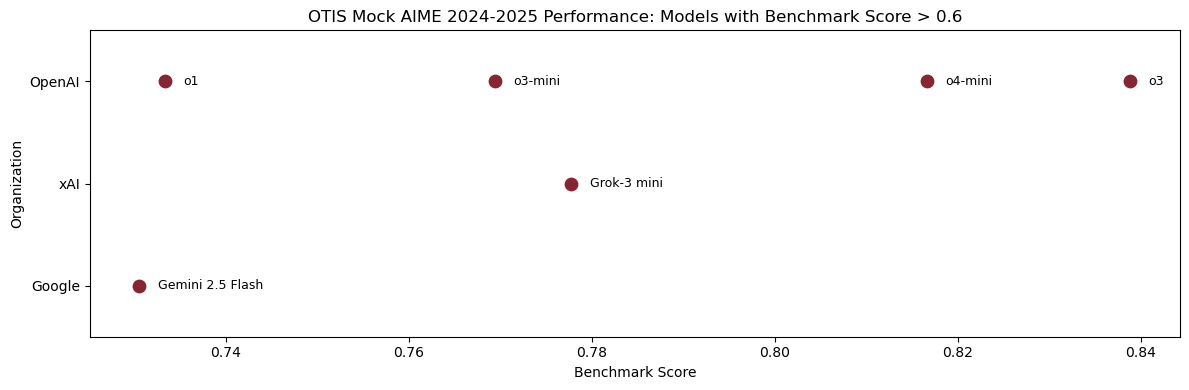

In [23]:
# Filter for models with Benchmark Score > 0.6
high_performing_models = mock_AIME[mock_AIME['Benchmark Score'] > 0.6]

# Create the scatter plot
plt.figure(figsize=(12, 4))
plt.scatter(x='Benchmark Score', y='Organization', data=high_performing_models, s=80, color='#862633')

# Add model names as text annotations with adjusted positions
for index, row in high_performing_models.iterrows():
    x_offset = 0.002  # Adjust horizontal offset as needed
    y_offset = 0.0    # Adjust vertical offset as needed
    plt.text(row['Benchmark Score'] + x_offset, row['Organization'], row['Model Name'], ha='left', va='center', fontsize=9)

# Get unique categories in order of appearance
organizations = high_performing_models['Organization'].unique()

# Set y-ticks back to organization names
plt.yticks(ticks=range(len(organizations)), labels=organizations)

# Fix vertical spacing (adds margin above and below)
plt.ylim(-0.5, len(organizations) - 0.5)

# Add title and labels
plt.title('OTIS Mock AIME 2024-2025 Performance: Models with Benchmark Score > 0.6')
plt.xlabel('Benchmark Score')
plt.ylabel('Organization')

plt.tight_layout()
plt.show()

In [24]:
# Sort the DataFrame by 'Benchmark Score' in descending order
top_models = mock_AIME.sort_values(by='Benchmark Score', ascending=False)

# Select the 'Model Name' and 'Benchmark Score' columns
top_models_table = top_models[['Model Name', 'Benchmark Score', 'Organization']].head(10) # Adjust the number (10) as needed

# Print the table
print("\nTop Performing Models:\n")
print(top_models_table.to_string(index=False))


Top Performing Models:

               Model Name  Benchmark Score Organization
                       o3         0.838889       OpenAI
                  o4-mini         0.816667       OpenAI
              Grok-3 mini         0.777778          xAI
                  o3-mini         0.769444       OpenAI
                       o1         0.733333       OpenAI
         Gemini 2.5 Flash         0.730556       Google
Gemini 2.0 Flash Thinking         0.577778       Google
        Claude 3.7 Sonnet         0.577778    Anthropic
                   Grok-3         0.555556          xAI
              DeepSeek-R1         0.533333     DeepSeek


Note:
- o3 - available for plus+ users
- o4-mini - available for everyone
- Grok-3 mini - available through API
- **o3-mini - No Longer Available**
- **o1 - No Longer Available**
- Gemini 2.5 Flash - available for everyone
- **Gemini 2.0 Flash Thinking - No Longer Available**
- Claude 3.7 Sonnet - available for everyone (limited)
- Grok-3 - available for everyone
- DeepSeek-R1 - available through websites

##### Summary of Findings

**Best Performance (Paid Option):** OpenAI's o3 stands out as the top performer based on the benchmark score. However, it requires an OpenAI Plus+ subscription, which costs $20 per month. For users willing to pay this fee, o3 offers the highest demonstrated capability in advanced mathematical problem-solving according to this data.

**Best Free Option (Still OpenAI):** OpenAI's o4-mini, which is available to everyone through ChatGPT, is a very strong contender. Despite a small performance decrease (around 2%) compared to o3, it provides high-level mathematical reasoning without a subscription cost. This makes ChatGPT with o4-mini an excellent option for general users seeking advanced math help without a paywall.

**Strong Free Alternative (Google):** Google's Gemini 2.5 Flash, also available to everyone through Gemini, demonstrates competitive performance. It appears to be a viable free alternative to ChatGPT for users who prefer the Google ecosystem or want to explore different models.

**Other Options (Anthropic and xAI):** Anthropic's Claude 3.7 Sonnet and xAI's Grok-3 are available to everyone, but their performance falls significantly (more than 25%)

**API Access (Grok-3 mini, DeepSeek-R1):** Grok-3 mini and DeepSeek-R1 are available through APIs or websites. While this makes them accessible, it often implies a more technical setup and potentially costs associated with API usage, making them less straightforward for the general public compared to direct integration within a user-friendly interface like ChatGPT or Gemini.

**Important Consideration for General Users:** It's worth noting that the highest-performing models from OpenAI (o3 and o4-mini) and Google (Gemini 2.5 Flash) are "thinking models" that require users to switch to a specific mode within the application. This might lead to a different conversational style compared to general-purpose models. In contrast, models like Claude 3.7 Sonnet and Grok-3 are general-purpose, offering a more seamless and consistent experience across various tasks, including reasoning. Therefore, users might face a trade-off between achieving the absolute highest performance on challenging math problems and the ease of use and consistent conversational style of general-purpose AI.

### Question: Did general purpose models from OpenAI and Google take this test?

In [25]:
mock_AIME[mock_AIME['Organization'] == 'OpenAI']

,Model Name,Version Release Date,Benchmark,Benchmark Score,Organization,Country,Source Type,Organization Category
11,GPT-4 Turbo,2024-04-09,OTIS Mock AIME 2024-2025,0.066667,OpenAI,United States of America,Closed-Source,Most Popular
12,GPT-4.1,2025-04-14,OTIS Mock AIME 2024-2025,0.383333,OpenAI,United States of America,Closed-Source,Most Popular
13,GPT-4.1 mini,2025-04-14,OTIS Mock AIME 2024-2025,0.447222,OpenAI,United States of America,Closed-Source,Most Popular
14,GPT-4.1 nano,2025-04-14,OTIS Mock AIME 2024-2025,0.288889,OpenAI,United States of America,Closed-Source,Most Popular
15,GPT-4.5,2025-02-27,OTIS Mock AIME 2024-2025,0.377778,OpenAI,United States of America,Closed-Source,Most Popular
16,GPT-4o,2024-11-20,OTIS Mock AIME 2024-2025,0.062500,OpenAI,United States of America,Closed-Source,Most Popular
52,o1,2024-12-17,OTIS Mock AIME 2024-2025,0.733333,OpenAI,United States of America,Closed-Source,Most Popular
53,o1-mini,2024-09-12,OTIS Mock AIME 2024-2025,0.469444,OpenAI,United States of America,Closed-Source,Most Popular
54,o1-preview,2024-09-12,OTIS Mock AIME 2024-2025,0.311111,OpenAI,United States of America,Closed-Source,Most Popular
55,o3,2025-04-16,OTIS Mock AIME 2024-2025,0.838889,OpenAI,United States of America,Closed-Source,Most Popular


In [26]:
mock_AIME[mock_AIME['Organization'] == 'Google']

,Model Name,Version Release Date,Benchmark,Benchmark Score,Organization,Country,Source Type,Organization Category
17,Gemini 1.0 Pro,2024-02-15,OTIS Mock AIME 2024-2025,0.011111,Google,United States of America,Closed-Source,Most Popular
18,Gemini 1.5 Flash,2024-09-24,OTIS Mock AIME 2024-2025,0.162500,Google,United States of America,Closed-Source,Most Popular
19,Gemini 1.5 Flash 8B,2024-10-03,OTIS Mock AIME 2024-2025,0.045833,Google,United States of America,Closed-Source,Most Popular
20,Gemini 1.5 Pro,2024-09-24,OTIS Mock AIME 2024-2025,0.230556,Google,United States of America,Closed-Source,Most Popular
21,Gemini 2.0 Flash,2025-02-05,OTIS Mock AIME 2024-2025,0.311111,Google,United States of America,Closed-Source,Most Popular
22,Gemini 2.0 Flash Thinking,2025-01-21,OTIS Mock AIME 2024-2025,0.577778,Google,United States of America,Closed-Source,Most Popular
23,Gemini 2.5 Flash,2025-04-17,OTIS Mock AIME 2024-2025,0.730556,Google,United States of America,Closed-Source,Most Popular
24,Gemma 2 27B,2024-06-24,OTIS Mock AIME 2024-2025,0.013889,Google,United States of America,Closed-Source,Most Popular
25,Gemma 2 9B,2024-06-24,OTIS Mock AIME 2024-2025,0.005556,Google,United States of America,Closed-Source,Most Popular
26,Gemma 3 27B,2025-03-12,OTIS Mock AIME 2024-2025,0.197222,Google,United States of America,Closed-Source,Most Popular


##### Summary of Findings

They did (GPT-4o and Gemini 2.0 Flash are the most recent general-purpose models), but they did poorly on this test. 
- GPT-4o (0.062500)
- Gemini 2.0 Flash (0.311111)
- Grok-3 (0.555556)
- Claude 3.7 Sonnet (0.577778)

In [49]:
df[df['Model Name'] == 'Grok-3']

,Model Name,Version Release Date,Benchmark,Benchmark Score,Organization,Country
274,Grok-3,2025-04-09,GPQA diamond,0.757576,xAI,United States of America
275,Grok-3,2025-04-09,OTIS Mock AIME 2024-2025,0.555556,xAI,United States of America
276,Grok-3,2025-04-09,FrontierMath-2025-02-28-Public,0.000000,xAI,United States of America
277,Grok-3,2025-04-09,MATH level 5,0.887462,xAI,United States of America
278,Grok-3,2025-04-09,FrontierMath-2025-02-28-Private,0.037931,xAI,United States of America


In [47]:
df[df['Model Name'] == 'Gemini 2.0 Flash']

,Model Name,Version Release Date,Benchmark,Benchmark Score,Organization,Country
123,Gemini 2.0 Flash,2025-02-05,GPQA diamond,0.641414,Google,United States of America
124,Gemini 2.0 Flash,2025-02-05,MATH level 5,0.821658,Google,United States of America
139,Gemini 2.0 Flash,2025-02-05,OTIS Mock AIME 2024-2025,0.311111,Google,United States of America
213,Gemini 2.0 Flash,2025-02-05,FrontierMath-2025-02-28-Public,0.000000,Google,United States of America
214,Gemini 2.0 Flash,2025-02-05,FrontierMath-2025-02-28-Private,0.017241,Google,United States of America
323,Gemini 2.0 Flash,2025-02-05,SWE-Bench verified,0.220000,Google,United States of America


In [48]:
df[df['Model Name'] == 'Claude 3.7 Sonnet']

,Model Name,Version Release Date,Benchmark,Benchmark Score,Organization,Country
135,Claude 3.7 Sonnet,2025-02-24,GPQA diamond,0.660354,Anthropic,United States of America
136,Claude 3.7 Sonnet,2025-02-24,MATH level 5,0.681835,Anthropic,United States of America
155,Claude 3.7 Sonnet,2025-02-24,OTIS Mock AIME 2024-2025,0.219444,Anthropic,United States of America
176,Claude 3.7 Sonnet,2025-02-24,GPQA diamond,0.767677,Anthropic,United States of America
177,Claude 3.7 Sonnet,2025-02-24,MATH level 5,0.862538,Anthropic,United States of America
178,Claude 3.7 Sonnet,2025-02-24,OTIS Mock AIME 2024-2025,0.466667,Anthropic,United States of America
195,Claude 3.7 Sonnet,2025-02-24,FrontierMath-2025-02-28-Private,0.031034,Anthropic,United States of America
196,Claude 3.7 Sonnet,2025-02-24,FrontierMath-2025-02-28-Public,0.000000,Anthropic,United States of America
197,Claude 3.7 Sonnet,2025-02-24,FrontierMath-2025-02-28-Private,0.041379,Anthropic,United States of America
232,Claude 3.7 Sonnet,2025-02-24,OTIS Mock AIME 2024-2025,0.533333,Anthropic,United States of America


In [53]:
df[df['Model Name'] == 'GPT-4o']

,Model Name,Version Release Date,Benchmark,Benchmark Score,Organization,Country
32,GPT-4o,2024-05-13,GPQA diamond,0.488952,OpenAI,United States of America
33,GPT-4o,2024-05-13,MATH level 5,0.510480,OpenAI,United States of America
34,GPT-4o,2024-08-06,GPQA diamond,0.492109,OpenAI,United States of America
35,GPT-4o,2024-08-06,MATH level 5,0.532761,OpenAI,United States of America
121,GPT-4o,2024-11-20,GPQA diamond,0.478851,OpenAI,United States of America
122,GPT-4o,2024-11-20,MATH level 5,0.497734,OpenAI,United States of America
142,GPT-4o,2024-11-20,OTIS Mock AIME 2024-2025,0.062500,OpenAI,United States of America
147,GPT-4o,2024-05-13,OTIS Mock AIME 2024-2025,0.062500,OpenAI,United States of America
148,GPT-4o,2024-08-06,OTIS Mock AIME 2024-2025,0.063889,OpenAI,United States of America
193,GPT-4o,2024-11-20,FrontierMath-2025-02-28-Public,0.000000,OpenAI,United States of America
